#### What It Does:
Forward Selection is a wrapper method for feature selection. It starts with an empty set of features and iteratively adds one feature at a time based on its contribution to the model's performance.


##### Useful:

It helps identify a subset of features that, when combined, lead to optimal model performance.
It can be computationally expensive for large datasets but is often effective in finding relevant features.

#### Conceptual Steps:

##### Start with No Features: Begin with an empty set of selected features.
##### Evaluate Each Feature: Evaluate the performance of the model (e.g., accuracy, F1-score, or other metrics) by adding one feature at a time from the remaining features.
##### Select the Best Feature: Choose the feature that results in the most significant improvement in the model's performance.
##### Add to Selected Set: Add the selected feature to the set of selected features.
##### Repeat: Repeat steps 2-4 until you reach a stopping criterion (e.g., a desired number of features, no further improvement in performance).

#### Mathematical Principle:

Forward Selection aims to find the optimal subset of features that maximizes a given performance metric. It involves a combinatorial search and typically evaluates all possible combinations of features to find the best one.  There's no explicit mathematical formula for the selection process itself, as it's an iterative algorithm.

In [31]:
from sklearn.feature_selection import SelectPercentile
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [33]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [34]:
# Store original column names
original_columns = X.columns

In [35]:
# Calculate 80% of the total number of features
num_features = X.shape[1]
k_features = int(num_features * 0.8)  


In [49]:
num_features

78

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the Linear regression model
model = LogisticRegression() # Increased max iterations for convergence


In [44]:
# Define the forward selection object
sfs = SFS(model, k_features=k_features, forward=True, floating=False, scoring="accuracy", cv=5, n_jobs=-1) # Use all available cores for parallel processing

In [45]:
# Perform forward selection on the training set
sfs.fit(X_train, y_train)
# Print selected features
print("Selected Features:", sfs.k_feature_names_)

Selected Features: ('Unnamed: 0.1', 'Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Std', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max'

Accuracy: 0.9883809794822909


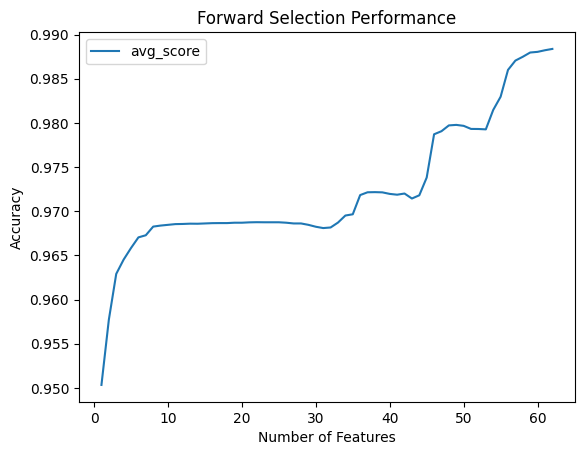

In [46]:
# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print('Accuracy:', accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df['avg_score'] = sfs_df['avg_score'].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind='line', y='avg_score', ax=ax)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy')
ax.set_title('Forward Selection Performance')
plt.show()

In [47]:
# Filter columns based on the selected features list
df_selected = df[[col for col in df.columns if col in list(sfs.k_feature_names_)]]

(df_selected) 

,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Tot Fwd Pkts,...,Subflow Bwd Pkts,Subflow Bwd Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Std
0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,0.000091,...,0.000601,0.000106,0.474380,0.000052,0.454545,0.001253,0.002184,0.004293,0.000644,0.001615
1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,0.000007,...,0.000046,0.000004,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,0.000156,...,0.001156,0.000203,0.007950,0.000046,0.000000,0.000618,0.001209,0.003237,0.000379,0.021086
3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,0.000026,...,0.000185,0.000011,0.003235,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,0.000059,...,0.000324,0.000051,0.959061,0.000033,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,0.000026,...,0.000139,0.000009,0.500015,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,0.000007,...,0.000046,0.000004,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000
172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,0.000026,...,0.000139,0.000011,0.500015,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,0.000085,...,0.000509,0.000120,0.002701,0.000039,0.454545,0.003830,0.004991,0.006237,0.001424,0.000647


In [48]:
df_selected.to_csv("ForwardSelection.csv")